In [1]:
#import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#import plotly
import matplotlib.pyplot as plt

#from plotly.offline import *


In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [4]:
import seaborn as sns

In [5]:
vote_data = pd.read_csv(r'Data\usa-2016-presidential-election-by-county.csv',sep =';')
vote_data.info

<bound method DataFrame.info of                State  ST   Fips                             County  Precincts  \
0               Ohio  OH  39001                 Adams County, Ohio       23.0   
1               Ohio  OH  39113            Montgomery County, Ohio      360.0   
2           Oklahoma  OK  40049            Garvin County, Oklahoma       17.0   
3           Oklahoma  OK  40089         McCurtain County, Oklahoma       30.0   
4           Oklahoma  OK  40133          Seminole County, Oklahoma       14.0   
5             Oregon  OR  41027          Hood River County, Oregon       13.0   
6             Oregon  OR  41029             Jackson County, Oregon       54.0   
7       Pennsylvania  PA  42023       Cameron County, Pennsylvania       10.0   
8       Pennsylvania  PA  42125    Washington County, Pennsylvania      176.0   
9     South Carolina  SC  45075  Orangeburg County, South Carolina       53.0   
10    South Carolina  SC  45081      Saluda County, South Carolina       18.0

In [6]:
print(vote_data.isnull().sum(axis = 0))

State                                  0
ST                                     1
Fips                                   0
County                                 0
Precincts                             32
Votes                                 32
Democrats 08 (Votes)                  31
Democrats 12 (Votes)                  31
Republicans 08 (Votes)                31
Republicans 12 (Votes)                31
Republicans 2016                      32
Democrats 2016                        32
Green 2016                           542
Libertarians 2016                     32
Republicans 2012                      31
Republicans 2008                      31
Democrats 2012                        31
Democrats 2008                        31
Less Than High School Diploma          0
At Least High School Diploma           0
At Least Bachelors's Degree            0
Graduate Degree                        0
School Enrollment                      0
Median Earnings 2010                   0
White (Not Latin

In [7]:
num_cols = vote_data.dropna(subset=['Republicans 2016', 'Democrats 2016'])

num_cols = num_cols.dropna(axis='columns')

num_cols = num_cols[num_cols._get_numeric_data().columns] # get numerical columns
num_cols.head()

list(num_cols.columns.values)

['Fips',
 'Precincts',
 'Votes',
 'Democrats 08 (Votes)',
 'Democrats 12 (Votes)',
 'Republicans 08 (Votes)',
 'Republicans 12 (Votes)',
 'Republicans 2016',
 'Democrats 2016',
 'Libertarians 2016',
 'Republicans 2012',
 'Republicans 2008',
 'Democrats 2012',
 'Democrats 2008',
 'Less Than High School Diploma',
 'At Least High School Diploma',
 "At Least Bachelors's Degree",
 'Graduate Degree',
 'School Enrollment',
 'Median Earnings 2010',
 'White (Not Latino) Population',
 'African American Population',
 'Native American Population',
 'Asian American Population',
 'Other Race or Races',
 'Latino Population',
 'Children Under 6 Living in Poverty',
 'Adults 65 and Older Living in Poverty',
 'Total Population',
 'Poverty.Rate.below.federal.poverty.threshold',
 'Gini.Coefficient',
 'Child.Poverty.living.in.families.below.the.poverty.line',
 'Management.professional.and.related.occupations',
 'Service.occupations',
 'Sales.and.office.occupations',
 'Farming.fishing.and.forestry.occupation

In [10]:
Data_sub = num_cols[['Democrats 2016', 'Republicans 2016','Less Than High School Diploma',
 'At Least High School Diploma',
 "At Least Bachelors's Degree",
 'Graduate Degree',
 'School Enrollment',
 'Median Earnings 2010',
 'White (Not Latino) Population',
 'African American Population',
 'Native American Population',
 'Asian American Population',
 'Other Race or Races',
 'Latino Population',
 'Children Under 6 Living in Poverty',
 'Adults 65 and Older Living in Poverty',
 'Total Population',
 'Poverty.Rate.below.federal.poverty.threshold',
 'Gini.Coefficient',
 'Child.Poverty.living.in.families.below.the.poverty.line',
 'Management.professional.and.related.occupations',
 'Service.occupations',
 'Sales.and.office.occupations',
 'Farming.fishing.and.forestry.occupations',
 'Construction.extraction.maintenance.and.repair.occupations',
 'Production.transportation.and.material.moving.occupations',
 'White',
 'Black',
 'Hispanic',
 'Asian',
 'Amerindian',
 'Other',
 'White_Asian',
 'SIRE_homogeneity',
 'median_age',
 'lon',
 'lat',
 'Adult.obesity','Diabetes',
 'Uninsured',
 'Unemployment','Unemployment']]

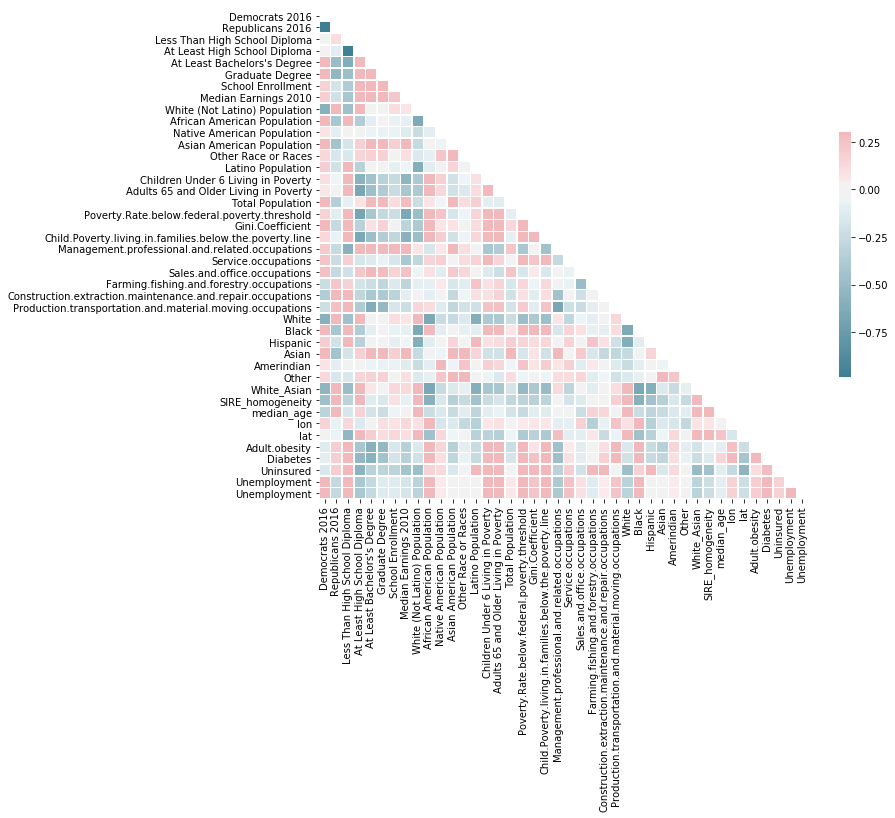

In [11]:
# Compute the correlation matrix
corr = Data_sub.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})